## Recursos e bibliotecas

In [ ]:
#instala o sqlalchemy
!pip install sqlalchemy

In [23]:
#importa as bibliotecas do projeto
from sqlalchemy import create_engine #conexão com o SQL Server
import pandas as pd #manipulação de Dataframes
import numpy as np #funções matemáticas
import matplotlib.pyplot as plt #gráficos
import seaborn as sns #gráficos
from sklearn.model_selection import train_test_split #separação do modelo em base de treino e teste
from sklearn import linear_model #regressão linear
from sklearn import metrics #medidas para avaliação do modelo de regressão
from sklearn.preprocessing import LabelEncoder #pré-processamento de dados, varíaveis categóricas em contínuas

## Configurando a conexão com nosso banco de dados

In [4]:
# Conectando com o Windows Authentication

try:
    Server = 'DESKTOP-9I30DAT'
    Database = 'ContosoRetailDW'
    Driver = 'ODBC Driver 17 for SQL Server'
    Database_con = f'mssql://@{Server}/{Database}?driver={Driver}'

    engine = create_engine(Database_con)
    conn = engine.connect()
    print("Conexão bem sucedida!")
except:
    print("Conexão falhou")

Conexão bem sucedida!


## Consulta para recuperação dos dados

In [5]:
# Consulta para pegarmos nossa base de dados do nosso banco
query = '''
        select 
                * 
        from vw_base_previsao 
        '''
df = pd.read_sql(query, conn)

#Mostrando as primeiras linhas da nossa base

display(df.head(5))

,ID da Venda,Data da Venda,Ano,Mês,Número do Mês,ID do Produto,Nome do Produto,Nome da Categoria,Nome da Subcategoria,Preço Unitário,Qtd. Vendida,Faturamento
0,1,02/01/2007,2007,January,1,956,A. Datum Point Shoot Digital Camera M500 Black,Cameras and camcorders,Digital Cameras,198.0,8,1584.0
1,2,12/02/2007,2007,February,2,766,Contoso Battery charger - bike E200 Black,Computers,Computers Accessories,19.9,4,79.6
2,3,24/01/2008,2008,January,1,1175,Fabrikam Budget Moviemaker 2/3'' 17mm E100 White,Cameras and camcorders,Camcorders,410.0,9,3690.0
3,4,13/01/2008,2008,January,1,1429,The Phone Company Touch Screen Phones 4-Wire/O...,Cell phones,Touch Screen Phones,289.0,8,2312.0
4,5,22/01/2008,2008,January,1,1133,"Fabrikam SLR Camera 35"" X358 Blue",Cameras and camcorders,Digital SLR Cameras,436.2,24,10468.8


In [6]:
# encerrando a conexão
conn.close()

In [7]:
#Nossa base de dados
df

,ID da Venda,Data da Venda,Ano,Mês,Número do Mês,ID do Produto,Nome do Produto,Nome da Categoria,Nome da Subcategoria,Preço Unitário,Qtd. Vendida,Faturamento
0,1,02/01/2007,2007,January,1,956,A. Datum Point Shoot Digital Camera M500 Black,Cameras and camcorders,Digital Cameras,198.00,8,1584.0
1,2,12/02/2007,2007,February,2,766,Contoso Battery charger - bike E200 Black,Computers,Computers Accessories,19.90,4,79.6
2,3,24/01/2008,2008,January,1,1175,Fabrikam Budget Moviemaker 2/3'' 17mm E100 White,Cameras and camcorders,Camcorders,410.00,9,3690.0
3,4,13/01/2008,2008,January,1,1429,The Phone Company Touch Screen Phones 4-Wire/O...,Cell phones,Touch Screen Phones,289.00,8,2312.0
4,5,22/01/2008,2008,January,1,1133,"Fabrikam SLR Camera 35"" X358 Blue",Cameras and camcorders,Digital SLR Cameras,436.20,24,10468.8
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199996,22/12/2008,2008,December,12,972,A. Datum Compact Digital Camera M200 Pink,Cameras and camcorders,Digital Cameras,129.00,8,1032.0
199996,199997,18/03/2008,2008,March,3,1064,A. Datum SLR Camera X140 Pink,Cameras and camcorders,Digital SLR Cameras,627.00,18,11286.0
199997,199998,08/07/2008,2008,July,7,2110,Contoso Water Heater 7.2GPM X1800 Red,Home Appliances,Water Heaters,1475.00,12,17700.0
199998,199999,13/07/2008,2008,July,7,716,Proseware High Speed Laser M2000 White,Computers,"Printers, Scanners & Fax",209.00,24,5016.0


## Análise Exploratória

Neste caso, nossa base ainda não está no formato ideal para realizarmos a modelagem. Precisaremos agrupar algumas colunas por mês e ano

In [8]:
#Verificando os tipos de dados
df.dtypes

ID da Venda               int64
Data da Venda            object
Ano                       int64
Mês                      object
Número do Mês             int64
ID do Produto             int64
Nome do Produto          object
Nome da Categoria        object
Nome da Subcategoria     object
Preço Unitário          float64
Qtd. Vendida              int64
Faturamento             float64
dtype: object

In [9]:
#Alterando o tipo de dados das coluna que iremos agrupar
conversao = ['Ano', 'Número do Mês', 'ID do Produto']

# Loop para converter as colunas para tipo str
for coluna in conversao:
    df[coluna] = df[coluna].astype(str)

In [10]:
df.dtypes

ID da Venda               int64
Data da Venda            object
Ano                      object
Mês                      object
Número do Mês            object
ID do Produto            object
Nome do Produto          object
Nome da Categoria        object
Nome da Subcategoria     object
Preço Unitário          float64
Qtd. Vendida              int64
Faturamento             float64
dtype: object

In [11]:
#Criando uma nova coluna Ano/mês na nossa base
df['Ano/mês'] = df['Ano'] + '/' + df['Número do Mês']

df['Ano/mês']

0          2007/1
1          2007/2
2          2008/1
3          2008/1
4          2008/1
           ...   
199995    2008/12
199996     2008/3
199997     2008/7
199998     2008/7
199999    2009/10
Name: Ano/mês, Length: 200000, dtype: object

In [12]:
#Nova coluna no final da nossa base
df.head()

,ID da Venda,Data da Venda,Ano,Mês,Número do Mês,ID do Produto,Nome do Produto,Nome da Categoria,Nome da Subcategoria,Preço Unitário,Qtd. Vendida,Faturamento,Ano/mês
0,1,02/01/2007,2007,January,1,956,A. Datum Point Shoot Digital Camera M500 Black,Cameras and camcorders,Digital Cameras,198.0,8,1584.0,2007/1
1,2,12/02/2007,2007,February,2,766,Contoso Battery charger - bike E200 Black,Computers,Computers Accessories,19.9,4,79.6,2007/2
2,3,24/01/2008,2008,January,1,1175,Fabrikam Budget Moviemaker 2/3'' 17mm E100 White,Cameras and camcorders,Camcorders,410.0,9,3690.0,2008/1
3,4,13/01/2008,2008,January,1,1429,The Phone Company Touch Screen Phones 4-Wire/O...,Cell phones,Touch Screen Phones,289.0,8,2312.0,2008/1
4,5,22/01/2008,2008,January,1,1133,"Fabrikam SLR Camera 35"" X358 Blue",Cameras and camcorders,Digital SLR Cameras,436.2,24,10468.8,2008/1


In [13]:
#Agrupamento da nossa base para a modelagem
df = df.groupby(['Ano',
                 'Mês',
                 'Ano/mês',
                 'ID do Produto',
                 'Nome do Produto',
                 'Nome da Categoria',
                 'Nome da Subcategoria',
                 'Preço Unitário']).agg({'Qtd. Vendida':'sum','Faturamento':'sum'}).reset_index(drop=False)

df

,Ano,Mês,Ano/mês,ID do Produto,Nome do Produto,Nome da Categoria,Nome da Subcategoria,Preço Unitário,Qtd. Vendida,Faturamento
0,2007,April,2007/4,1,Contoso 512MB MP3 Player E51 Silver,Audio,MP4&MP3,12.99,12,155.88
1,2007,April,2007/4,10,Contoso 4G MP3 Player E400 Green,Audio,MP4&MP3,59.99,12,719.88
2,2007,April,2007/4,1000,A. Datum Compact Digital Camera M200 Orange,Cameras and camcorders,Digital Cameras,129.00,14,1806.00
3,2007,April,2007/4,1001,A. Datum Rangefinder Digital Camera X200 Orange,Cameras and camcorders,Digital Cameras,200.00,90,18000.00
4,2007,April,2007/4,1003,A. Datum Ultra Compact Digital Camera M190 Orange,Cameras and camcorders,Digital Cameras,165.00,25,4125.00
...,...,...,...,...,...,...,...,...,...,...
67038,2009,September,2009/9,993,A. Datum Consumer Digital Camera E100 Silver,Cameras and camcorders,Digital Cameras,281.00,18,5058.00
67039,2009,September,2009/9,994,A. Datum Consumer Digital Camera M300 Silver,Cameras and camcorders,Digital Cameras,184.50,18,3321.00
67040,2009,September,2009/9,995,A. Datum Advanced Digital Camera M300 Silver,Cameras and camcorders,Digital Cameras,188.50,19,3581.50
67041,2009,September,2009/9,997,A. Datum SLR-like Digital Camera M400 Silver,Cameras and camcorders,Digital Cameras,196.90,20,3938.00


In [14]:
# Forma da nossa base com 67043 linhas e 10 colunas
df.shape

(67043, 10)

In [15]:
# Verificando valores duplicados
df.duplicated().sum()

0

In [16]:
# Verificando valores únicos
df.nunique()

Ano                         3
Mês                        12
Ano/mês                    36
ID do Produto            2516
Nome do Produto          2516
Nome da Categoria           8
Nome da Subcategoria       32
Preço Unitário            426
Qtd. Vendida              353
Faturamento             17397
dtype: int64

In [17]:
df.dtypes

Ano                      object
Mês                      object
Ano/mês                  object
ID do Produto            object
Nome do Produto          object
Nome da Categoria        object
Nome da Subcategoria     object
Preço Unitário          float64
Qtd. Vendida              int64
Faturamento             float64
dtype: object

In [18]:
# Vou retirar as colunas categorigas da nossa base para vermos a correlação entre as variáveis
base = df.drop(['Ano',
                'Mês',
                'Ano/mês',
                'ID do Produto',
                'Nome do Produto',
                'Nome da Categoria',
                'Nome da Subcategoria'],axis=1)

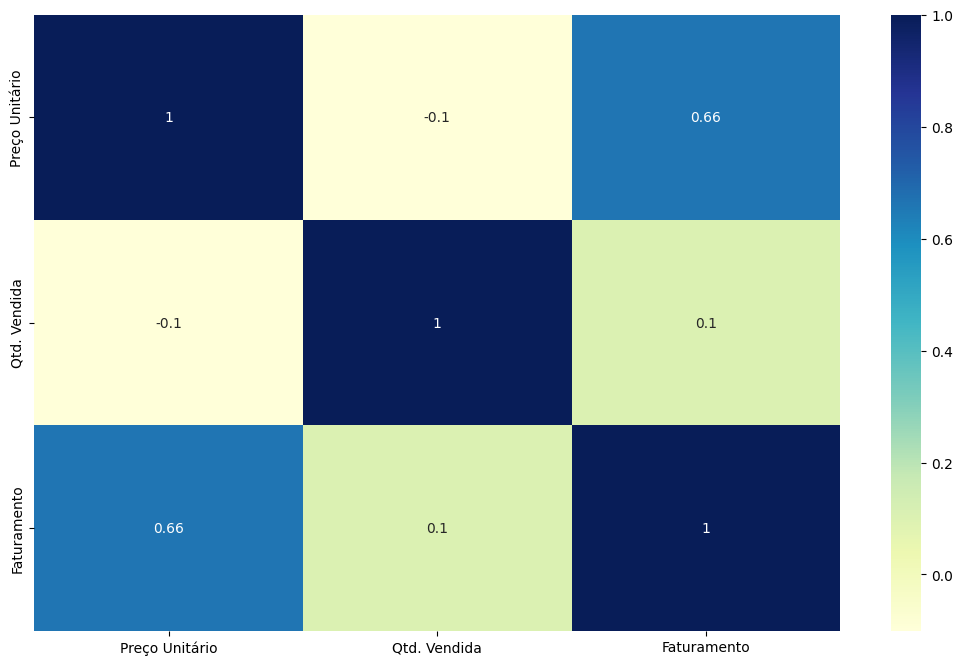

In [20]:
# Mostrando a correlação entre as variáveis
plt.figure(figsize=(13,8))
sns.heatmap(base.corr(),annot=True,cmap="YlGnBu")
plt.show()

Temos poucas varíaveis contínuas para escolher e colocar em nosso modelo, teremos que transformar nossas varíaveís categoricas em contínuas para analisarmos a correlação

In [24]:
lb = LabelEncoder()

# Aplica o encoder nas variáveis que estão com string
encoder = ['Ano','Mês','Ano/mês','ID do Produto','Nome do Produto','Nome da Categoria','Nome da Subcategoria']

# Loop para conversão das colunas categóricas
for coluna in encoder:
    df[coluna] = lb.fit_transform(df[coluna])

# Remove valores missing eventualmente gerados
df.dropna(inplace = True)

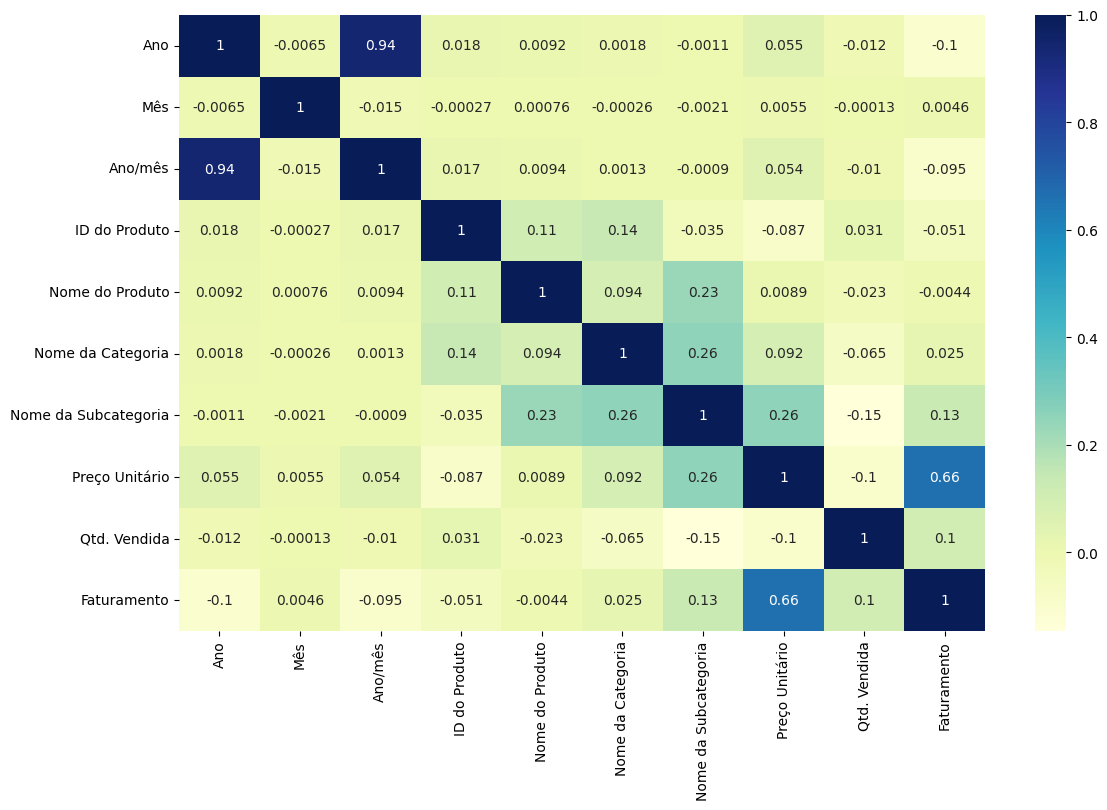

In [25]:
# Mostrando a correlação entre todas as varíaveis
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [22]:
#Aqui temos as principais medidas das nossas varíaveis contínuas
df.describe()

,Preço Unitário,Qtd. Vendida,Faturamento
count,67043.000000,67043.000000,67043.000000
mean,327.869170,46.615023,11065.178641
std,441.640359,94.939337,17987.259473
min,0.950000,2.000000,3.800000
25%,67.400000,18.000000,1820.200000
50%,196.000000,30.000000,5216.000000
75%,382.950000,50.000000,12900.500000
max,3199.990000,3360.000000,538538.700000


## Modelagem

### Bibliotecas utilizadas para a análise e modelagem

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics